<a href="https://colab.research.google.com/github/dksifoua/Reinforcement-Learning/blob/master/notebooks/00%20-%20Sequential%20Decision%20Making%20Under%20Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
if [ -n "$COLAB_RELEASE_TAG" ]; then
  git clone https://github.com/dksifoua/Reinforcement-Learning.git
fi

In [2]:
import os

if os.environ.get("COLAB_RELEASE_TAG") is not None:
    os.chdir("./Reinforcement-Learning")
elif str(os.getcwd()).endswith("notebooks"):
    os.chdir("../")
else:
    pass

print("Current working directory:", os.getcwd())

Current working directory: /Users/dksifoua/Developer/learning/Reinforcement-Learning


# Sequential Decision Making Under Uncertainty

In reinforcement learning, an agent generates its own training data by interacting with the world. Unlike supervised learning, where correct actions are provided, the agent must discover the consequences of its actions through trial and error. We introduce the fundamentals of reinforcement learning (RL) by focusing on the evaluative aspect of decision-making under uncertainty. We'll explore how agents learn from interactions with their environment, emphasizing key concepts like rewards, timesteps, and values. The core framework is the k-armed bandit problem, a simplified setting that captures essential RL ideas.
___

In [3]:
%load_ext autoreload
%autoreload 2

from rl.environments import KArmedBanditEnvironment

## 1. The K-Armed Bandit problem

In a k-armed bandit problem, an **agent** is faced repeatedly with a choice among k different **actions**. After taking each action, it receives a numerical **reward** chosen from a **stationary probability distribution** that depends on the selected action. The objective is **to maximize the expected total reward over some time period**, for example, over 1000 action selections, or **time steps**.

Each of the k actions has an expected or mean reward given that that action is selected; let us call this the **value** of that action. We denote the action selected on time step $t$ as $A_t$, and the corresponding reward as $R_t$. The value of an arbitrary action $a$, denoted $q_*(a)$, is the expected reward given that a is selected:

$$ q_*(a) \; \dot{=} \; \mathbb{E}[R_t|A_t = a] $$

In the k-armed bandit setting, we do not know the action values with certainty (although you may have estimates). We denote the estimated value of action $a$ at time step $t$ as $Q_t(a)$. We would like $Q_t(a)$ to be close to $q_*(a)$. With action values been estimated, we called **greedy actions** those with the highest estimates. Selecting a greedy action **exploits** current knowledge for immediate reward maximization. Conversely, choosing a non-greedy action **explores** to refine estimates, potentially yielding higher long-term rewards by uncovering superior options. Exploration is valuable when uncertainty exists and many future opportunities remain. Since a single choice can’t both explore and exploit, there is an inherent conflict between the two strategies.

The decision to explore or exploit in a given scenario heavily relies on action value estimates, their uncertainties, and remaining time steps. While advanced methods exist to balance this in k-armed bandit problems and variants, they often rely on unrealistic assumptions like stationarity and prior knowledge, which fail in real-world applications or broader reinforcement learning contexts, rendering their optimality guarantees unreliable.
___

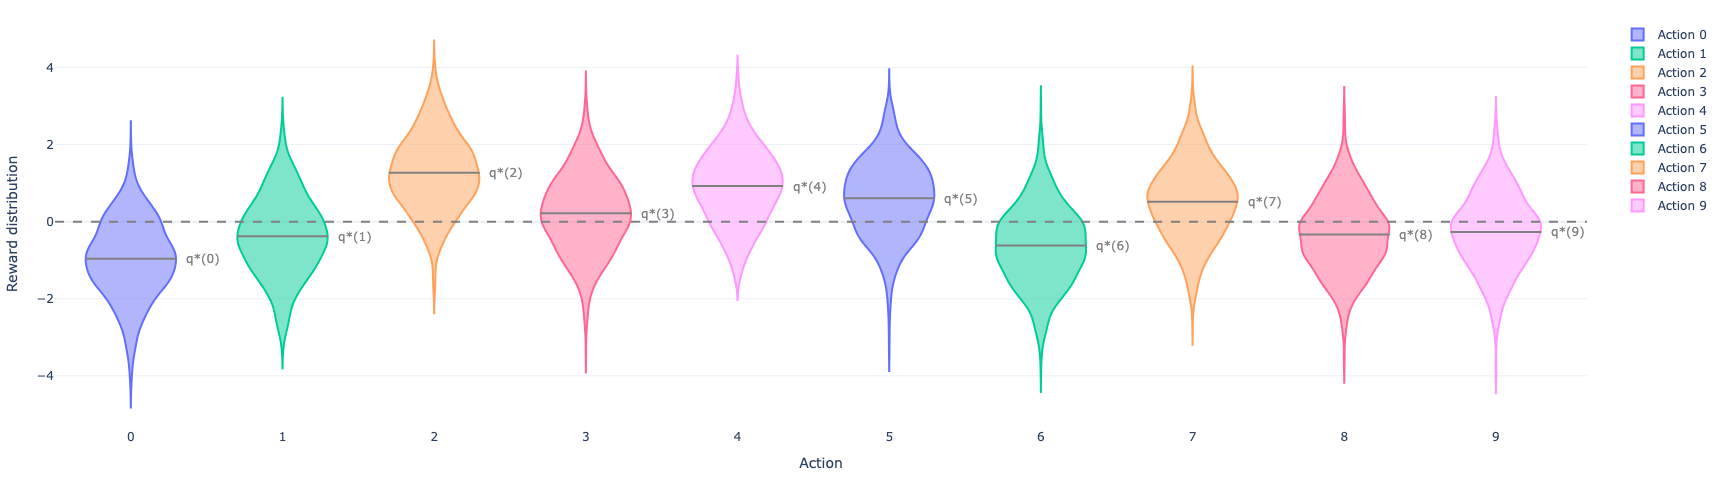

In [4]:
KArmedBanditEnvironment.plot_reward_distribution()

## 2. Action-Value Methods

### 2.1. Sampling Average Methods

Action-Value methods estimates action values in order to make action selection decisions. Recall that the true value of an action is the mean reward when that action is selected:

$$
Q_t(a) \; \dot{=} \; \frac{\text{sum of rewards when $a$ taken prior to $t$}}{\text{number of times $a$ taken prior to $t$}} \; 
= \; \frac{\sum_{i = 1}^{t - 1} R_i \cdot \mathbb{I}_{A_i = a}}{\sum_{i = 1}^{t - 1} \mathbb{I}_{A_i = a}},
$$

where $\mathbb{I}_{predicate}$ denotes the random variable that is $1$ if predicate is true and $0$ if it is not. If the denominator is zero, then we instead define $Q_t(a)$ as some default value, such as $0$. As the denominator goes to infinity, by the law of large numbers, $Q_t(a)$ converges to $q_*(a)$. We call this the **sample-average method** for estimating action values because each estimate is an average of the sample of relevant rewards.

#### 2.1.1. Greedy Action Selection

Now that we have estimated the action values, the simplest action selection rule is to select one of the actions with the highest estimated value (**greedy action selection**). If there is more than one greedy action, then a selection is made among them in some arbitrary way, perhaps randomly. We write this greedy action selection method as:

$$
A_t \; = \; \arg{\max_{a}(Q_t(a))},
$$

where $\arg{\max_{a}}$ denotes the action $a$ for which the expression that follows is maximized (again, with ties broken arbitrarily). Greedy action selection always exploits the action maximizing $Q_t(a)$ (breaking ties arbitrarily) to exploit current estimates for immediate reward, ignoring potential better alternatives.

#### 2.1.2. $\varepsilon$-Greedy Action Selection

Let's introduce **$\varepsilon$-greedy action selection**, a near-greedy action selection rule where most of the time, we behave greedily, but once in a while, say with a small probability $\varepsilon$, we randomly choose among all actions with equal probability, independently of the action-value estimates.  An advantage of this method is that, in the limit as the number of steps increases, every action will be sampled an infinite number of times, thus ensuring that all the $Q_t(a)$ converge to $q_*(a)$.

**Note:** In $\varepsilon$-greedy action selection, as the number of steps approaches infinity, the action-value estimates $Q_t(a)$ converge to the true values $q_*(a)$, so the greedy choice becomes the optimal action with probability $1$. The overall probability of selecting the optimal action then becomes:
- With probability $1 - \varepsilon$: Select the greedy (optimal) action, contributing $1 - \varepsilon$.
- With probability $\varepsilon$: Select randomly among all $k$ actions (assuming $k \geq 2$), so the chance of picking the optimal one is $\varepsilon / k$.

Thus, the total probability is $1 - \varepsilon + \varepsilon / k$, which is strictly greater than $1 - \varepsilon$ (since $\varepsilon / k > 0$). This holds asymptotically, approaching **near certainty** as $\varepsilon$ is small, but the exact limit depends on $k$.
___